## EDSA Kaggle Language classification challenge 

The objective of this notebook is to classify text into one of the 11 languages in South Africa based on text. We will make use of various ML models to classify the data.

1. Loading data 
2. EDA and Engineering
3. Splitting the data into train and test
4. Model building and predictions
5. Predicting on unseen data and printing out the results

# 1.Loading data 
Lets import some modules we need

In [8]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report

In [9]:
df_train = pd.read_csv('train_set.csv') #loading the dataset we will train the models on

# 2. EDA and Engineering

In [10]:
df_train.dtypes #looking at the data types

lang_id    object
text       object
dtype: object

Lets take a look at our target variable 

In [11]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

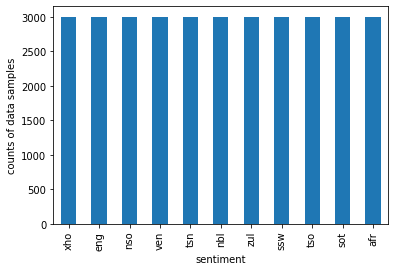

In [4]:
df_train['lang_id'].value_counts().plot(kind = 'bar')
plt.xlabel('sentiment')
plt.ylabel('counts of data samples')
plt.show()

We can see that all the languages occur equal amount occur in the data

Now lets remove some common things you may find in text taken from public sources that might muddy the result we get from the model like urls, upper case letters, digits and words that contain digits and punctuation.

In [12]:
#Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['text'] = df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#Remove punctuation
import string
def punctuation_removal(message):
    return ''.join([i for i in message if i not in string.punctuation])
df_train['text'] = df_train['text'].apply(punctuation_removal)


#Lets make sure everything is lower case as Upper case letters can act as noise as well
df_train['text'] = df_train['text'].str.lower() 

#Remove digits from
df_train['text']=df_train['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

df_train['text'].head()

0    umgaqosiseko wenza amalungiselelo kumaziko axh...
1    idha iya kuba nobulumko bokubeka umsebenzi nap...
2    the province of kwazulunatal department of tra...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

Lets vectorize the text so it can be used in by the model. This converts the text into numbers that can be understood by computers. Lets begin with a basic example and use the default values.

In [7]:
tidf = TfidfVectorizer(strip_accents=False,stop_words='english',ngram_range=(1,2),max_df=0.5)
features = tidf.fit_transform(df_train['text'])
labels = df_train.lang_id
features.shape

(33000, 705595)

## 3. Splitting the data into train and test

In [52]:
X_train, X_test, y_train, y_test= train_test_split(features,
                                                 labels,
                                                 train_size=0.8,
                                                 random_state=42)

## 4. Model building and predictions

In [76]:
model = LinearSVC()
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
X_train_vt = selector.fit_transform(X_train)

Fit the model to the Data

In [54]:
model.fit(X_train, y_train)

LinearSVC()

Now lets make some predictions to see if it all works

In [55]:
y_pred = model.predict(X_test)

Lets take a look at the F1 score for our predicted values

In [56]:
metrics.f1_score(y_test, y_pred,average='weighted')

0.996514148585866

The output looks close to 1 so this means our model is close to accurate

In [57]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         afr       1.00      0.99      1.00       583\n         eng       0.99      1.00      1.00       615\n         nbl       0.99      0.99      0.99       583\n         nso       1.00      1.00      1.00       625\n         sot       1.00      1.00      1.00       618\n         ssw       1.00      1.00      1.00       584\n         tsn       1.00      1.00      1.00       598\n         tso       1.00      1.00      1.00       561\n         ven       1.00      1.00      1.00       634\n         xho       0.99      1.00      0.99       609\n         zul       0.99      0.99      0.99       590\n\n    accuracy                           1.00      6600\n   macro avg       1.00      1.00      1.00      6600\nweighted avg       1.00      1.00      1.00      6600\n'

# 5. Predicting on unseen data

 **Now we use the model and predict values based on the test data** 

In [58]:
unseen = pd.read_csv('test_set.csv')

Taking a look at the data we can see that we have text that needs to be cleaned 

In [59]:
unseen

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


The following code will clean the unseen data 

In [60]:
#Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
unseen['text'] = unseen['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#Remove punctuation
import string
def punctuation_removal(message):
    return ''.join([i for i in message if i not in string.punctuation])
unseen['text'] = unseen['text'].apply(punctuation_removal)


#Lets make sure everything is lower case as Upper case letters can act as noise as well
unseen['text'] = unseen['text'].str.lower() 

#Remove digits from
unseen['text']=unseen['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

unseen['text'].head()

0    mmasepala fa maemo a a kgethegileng a letlelel...
1    uzakwaziswa ngokufaneleko nakungafuneka eminye...
2            tshivhumbeo tshi fana na ngano dza vhathu
3    kube inja nelikati betingevakala kutsi titsini...
4                         winste op buitelandse valuta
Name: text, dtype: object

In [61]:
X_unseen = tidf.transform(unseen['text']) #transforming the unseen text data into a form that the model can use

In [63]:
y_pred_unseen = model.predict(X_unseen) #predicting on unseen data

In [64]:
df_final = pd.DataFrame(y_pred_unseen,columns=['lang_id'])# creating the dataframe to be submitted 

In [65]:
df_final['index'] = unseen['index']

In [66]:
df_final.to_csv('submission.csv',index=False) #print to CSV

# But surely we can do more...

Lets fit our data to multiple models and use the classification report tool to determine the best performing ones.

In [36]:
#The following code is adapted from the a train. First lets declare two lists we will loop over which contain the name of the classifiers and their objects

names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost']



classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()
]

Warning! Due to the nature of the code below, it will take a long time to run on underpowered machines 

In [38]:

#Here we loop over the classifiers lists and save their outputs to the lists and dictionaries below
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,pos_label='positive',average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,pos_label='positive',average='weighted')

    f1        = metrics.f1_score(y_train, y_pred,pos_label='positive',average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test,pos_label='positive',average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')



Fitting Logistic Regression model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\

Fitting Nearest Neighbors model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\

Fitting Linear SVM model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\sit

Fitting RBF SVM model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\

Fitting Decision Tree model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\sit

Fitting Random Forest model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\

Fitting AdaBoost model...
... predicting
... scoring


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\sit

... All done!


c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now lets take a look at our target score the F1 score and as we can see the Logistic Regression performs better on unseen test data

In [70]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.999455,0.999456,0.999455,0.999455,0.990847,90.296666
RBF SVM,1.000000,1.000000,1.000000,1.000000,0.979667,247.745658
Nearest Neighbors,0.979394,0.979598,0.979394,0.979341,0.952880,0.014588
Linear SVM,0.604970,0.556815,0.604970,0.554566,0.540549,162.797579
Decision Tree,0.534545,0.740297,0.534545,0.486335,0.478455,15.207339
AdaBoost,0.391091,0.345906,0.391091,0.300719,0.301234,535.112723
Random Forest,0.099576,0.914091,0.099576,0.025693,0.018374,0.156542


# Lets try using different models

For the sake of simplicity and compute time, we will use the default values of their parameters

Now lets try using the RBF SVM

In [30]:
svc = SVC(C=1, gamma=2)

In [31]:
svc.fit(X_train,y_train)

SVC(C=1, gamma=2)

In [32]:
import pickle
pickle.dump(svc,open('svc.pkl','wb')) #saving the model in case we want to use it later

In [33]:
y_pred_svc = svc.predict(X_unseen)

In [ ]:
metrics.f1_score(y_test, y_pred_svc,average='weighted')

In [34]:
df_final_svc = pd.DataFrame(y_pred_svc,columns=['lang_id'])
df_final_svc['index'] = unseen['index']
df_final_svc.to_csv('submission_svc.csv',index=False)
df_final_svc

,lang_id,index
0,zul,1
1,nbl,2
2,ven,3
3,ssw,4
4,zul,5
...,...,...
5677,eng,5678
5678,nso,5679
5679,sot,5680
5680,sot,5681


The scoring on kaggle was not great so lets try another model

Now lets try a LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_lr = lr.predict(X_unseen)
df_final_lr = pd.DataFrame(y_pred_lr,columns=['lang_id'])
df_final_lr['index'] = unseen['index']
df_final_lr.to_csv('submission_lr.csv',index=False)
df_final_lr


,lang_id,index
0,tsn,1
1,nbl,2
2,ven,3
3,ssw,4
4,eng,5
...,...,...
5677,eng,5678
5678,nso,5679
5679,sot,5680
5680,sot,5681


Lets try another model

In [38]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [39]:
y_pred_kn=kn.predict(X_unseen)
df_final_kn = pd.DataFrame(y_pred_lr,columns=['lang_id'])
df_final_kn['index'] = unseen['index']
df_final_kn.to_csv('submission_kn.csv',index=False)
df_final_kn


,lang_id,index
0,tsn,1
1,nbl,2
2,ven,3
3,ssw,4
4,eng,5
...,...,...
5677,eng,5678
5678,nso,5679
5679,sot,5680
5680,sot,5681


In [82]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [84]:
y_pred_adb=adb.predict(X_unseen)
df_final_adb = pd.DataFrame(y_pred_adb,columns=['lang_id'])
df_final_adb['index'] = unseen['index']
df_final_adb.to_csv('submission_adb.csv',index=False)
df_final_adb


,lang_id,index
0,eng,1
1,eng,2
2,ven,3
3,eng,4
4,eng,5
...,...,...
5677,eng,5678
5678,sot,5679
5679,sot,5680
5680,sot,5681
